In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
from IPython.display import display,Markdown,Latex
from qiskit.visualization import array_to_latex

<IPython.core.display.Latex object>

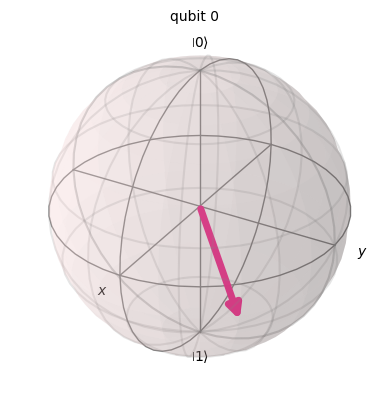

In [2]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex  

theta = 1.9
phi   = 0.8

psi_ket = np.array([np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]).reshape(2,1)
array_to_latex(psi_ket,prefix= '\ket{\psi} = ')

display(Statevector(psi_ket).draw('latex'))
display(Statevector(psi_ket).draw('Bloch'))

In [3]:
p0 = np.abs(psi_ket[0])**2
p1 = np.abs(psi_ket[1])**2

print('p(0)=', np.round(p0,5),', p(1)=', np.round(p1,5))

p(0)= [0.33836] , p(1)= [0.66164]


In [4]:
nshots = 10000

/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


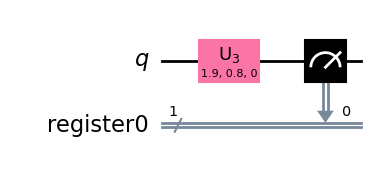

[Qibo 0.1.12.dev0|INFO|2024-03-09 14:00:27]: Using tensorflow backend on /device:CPU:0


counts_psi =  Counter({'1': <tf.Tensor: shape=(), dtype=int64, numpy=6699>, '0': <tf.Tensor: shape=(), dtype=int64, numpy=3301>})


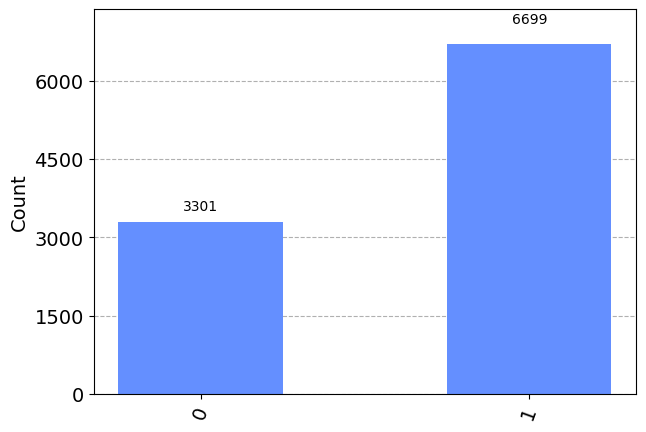

In [5]:
'''Qibo_code_cell'''
from qibo.models.circuit import Circuit, gates

'generamos un circuito en el que inicializamos el estado psi'
qc_psi_Qibo = Circuit(1)
qc_psi_Qibo.add(gates.U3(0, theta, phi, 0, trainable=True))
qc_psi_Qibo.add(gates.M(0))
display(tQ.draw_qibo_circuit_mpl(qc_psi_Qibo))
'ejecutamos un número de veces'
counts_psi = qc_psi_Qibo(nshots=nshots).frequencies()

'visualizamos los resultados como un diccionario y  mediante un histograma'
from qiskit.visualization import plot_histogram
print('counts_psi = ',counts_psi)
plot_histogram(counts_psi) # Mostramos un histograma de resultados

In [6]:
p0_experiment = counts_psi['0']/nshots
p1_experiment = counts_psi['1']/nshots

print('p(0)_experiment =', p0_experiment,'  p(1)_experiment = ',p1_experiment)

p(0)_experiment = tf.Tensor(0.3301, shape=(), dtype=float64)   p(1)_experiment =  tf.Tensor(0.6699, shape=(), dtype=float64)


In [7]:
#psi_ket= tQ.random_ket(2).reshape(2)
display(Statevector(psi_ket).draw('latex'))
qc_psi = QuantumCircuit(1,1)
qc_psi.initialize(psi_state,0)
qc_psi.draw('mpl')

<IPython.core.display.Latex object>

NameError: name 'psi_state' is not defined

/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


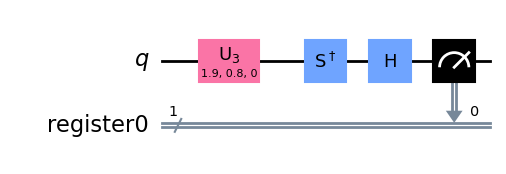

Counter({'0': <tf.Tensor: shape=(), dtype=int64, numpy=8341>, '1': <tf.Tensor: shape=(), dtype=int64, numpy=1659>})
< Y > = 0.6682


In [8]:
'''Qibo_code_cell'''
from qibo.models.circuit import Circuit, gates

qc_psi_Qibo = Circuit(1)
qc_psi_Qibo.add(gates.U3(0, theta, phi, 0, trainable=True))

'añadimos el medidor efectivo segun queramos medir sea <X>, <Y> o <Z>'
P = 'Y'

if P =='X':
    qc_psi_Qibo.add(gates.h(0))    

elif P =='Y':
    qc_psi_Qibo.add(gates.SDG(0))    
    qc_psi_Qibo.add(gates.H(0))    

qc_psi_Qibo.add(gates.M(0))
display(tQ.draw_qibo_circuit_mpl(qc_psi_Qibo))

'ejecutamos'
nshots = 10000
counts_psi = qc_psi_Qibo(nshots=nshots).frequencies()
print(counts_psi)

'Ahora,con las frecuencias relativas de los autovalores  de Z, podemos calcular los valores medios'
mean_P = 0
for bits, counts  in counts_psi.items():
    mean_P += (-1)**(int(bits))* (counts/nshots)

print('<',P,'>','=',np.round(mean_P,5))

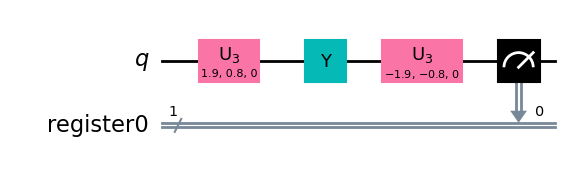

Counter({'1': <tf.Tensor: shape=(), dtype=int64, numpy=8571>, '0': <tf.Tensor: shape=(), dtype=int64, numpy=1429>})


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices, got '0'

In [9]:
'''Qibo_code_cell'''
from qibo.models.circuit import Circuit, gates

qc_psi_Qibo = Circuit(1)
qc_psi_Qibo.add(gates.U3(0, theta, phi, 0, trainable=True))

'fijemos el observable a medir'
P = 'Y'

if P =='X':
    qc_psi_Qibo.add(gates.X(0))
elif P=='Y':
    qc_psi_Qibo.add(gates.Y(0))
elif P=='Z':
    qc_psi_Qibo.add(gates.Z(0))

qc_psi_Qibo.add(gates.U3(0, -theta, -phi, 0, trainable=True))

qc_psi_Qibo.add(gates.M(0))
display(tQ.draw_qibo_circuit_mpl(qc_psi_Qibo))

'ejecutamos'
nshots = 10000
counts_psi = qc_psi_Qibo(nshots=nshots).frequencies()
print(counts_psi)

' ahora solo nos interesa la fracción de 0s '
mean_P = np.sqrt(counts['0']/shots)
print('|<',P,'>| =',np.round(mean_P,5))
